# Clas-06, Jan31/2023,  ANN Models
(Hossen Teimoorinia)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
### import the following modules:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection as md
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from matplotlib import cm
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
import pandas as pd 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
covtype = pd.read_csv('covtype.csv')
print(covtype.shape)
print(covtype.columns)

#covtype1 = covtype[(covtype['Cover_Type'] == 1)]
#covtype2 = covtype[(covtype['Cover_Type'] == 2)]

#covtypef = covtype1.append(covtype2)

#print(covtypef["Cover_Type"].unique())

#print(covtypef.shape)

(581012, 55)
Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39',

In [3]:
# "class" column as numpy array.
y = covtype["Cover_Type"].values
print(type(y))

# All data except "class" column.
x = covtype.drop(["Cover_Type"], axis=1).values
print(x.shape)

ohe = OneHotEncoder(sparse=False)
tar= np.reshape(y,(-1,1))
tar = ohe.fit_transform(tar)

# Split data for train and test.
X_tr, X_va, Y_tr, Y_va = train_test_split(x, tar, test_size=0.25)

print ('training set == ',np.shape(X_tr),np.shape(Y_tr),',, validation set == ', np.shape(X_va),np.shape(Y_va))
    
scaler_S= StandardScaler().fit(X_tr)  # line #2
X_tr_Norm= scaler_S.transform(X_tr) # line # 3
X_va_Norm= scaler_S.transform(X_va)  # Line #4

<class 'numpy.ndarray'>
(581012, 54)
training set ==  (435759, 54) (435759, 7) ,, validation set ==  (145253, 54) (145253, 7)


In [4]:
clf = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(100,50), max_iter=2000,
                   early_stopping=True, validation_fraction=0.1 )

## fitting the model:
clf.fit(X_tr, Y_tr)

## predict the response for tr and va sets. We can have two outputs: probability (e.g.,PY_tr_prob ) and  the winner class (e.g.,PY_tr):
PY_tr_prob = clf.predict_proba(X_tr)
PY_tr = clf.predict(X_tr)

PY_va_prob = clf.predict_proba(X_va)
PY_va = clf.predict(X_va)


print ('Training Done')


Training Done


In [5]:
n_img= np.random.choice(len(X_tr))
print(PY_tr_prob[n_img])
print(PY_tr[n_img])

plt.figure(1)

#plt.imshow(np.reshape(X_tr[n_img],(28,28)))

[4.99057719e-001 5.91403847e-001 8.56142832e-117 1.44038517e-088
 1.29295299e-002 1.09554321e-023 7.72064637e-005]
[0 1 0 0 0 0 0]


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Confusion matrix, without normalization
[[42576  7370  1165    57   299   646  1250]
 [ 9914 62634   384     0  1349   365   156]
 [    0   247  6513    83    43   308     0]
 [    0     0   113   514     0    37     0]
 [   40   151     0     0   697     3     6]
 [   19   367   843    48    33  3067     0]
 [  296    19     0     0     0     0  3641]]


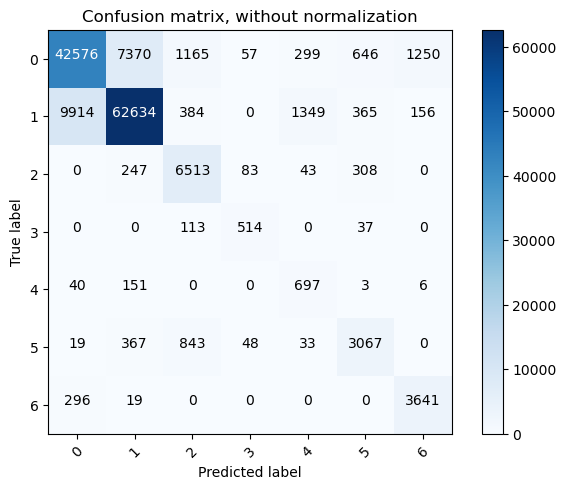

Normalized confusion matrix
[[0.79785619 0.13811068 0.02183161 0.00106816 0.00560313 0.01210577
  0.02342447]
 [0.13253656 0.83733055 0.00513355 0.         0.01803428 0.00487955
  0.00208551]
 [0.         0.03433417 0.90533778 0.01153739 0.0059772  0.04281346
  0.        ]
 [0.         0.         0.17018072 0.77409639 0.         0.05572289
  0.        ]
 [0.04459309 0.16833891 0.         0.         0.77703456 0.00334448
  0.00668896]
 [0.00434087 0.08384738 0.19259767 0.01096642 0.00753941 0.70070825
  0.        ]
 [0.07482305 0.00480283 0.         0.         0.         0.
  0.92037412]]


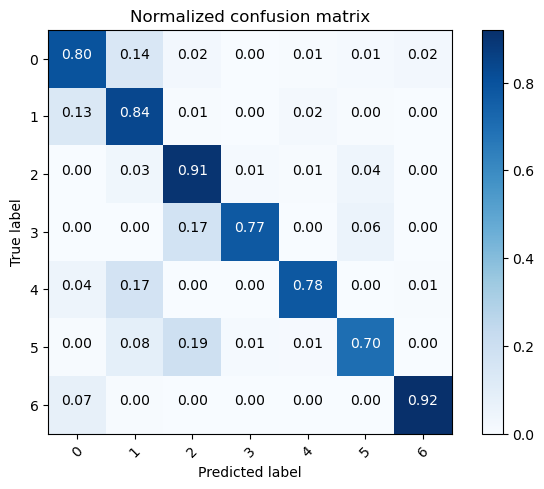

In [8]:
import itertools
import numpy as np
import matplotlib.pyplot as plt


from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Compute confusion matrix
cnf_matrix = confusion_matrix(PY_va.argmax(axis=1), Y_va.argmax(axis=1))

#confusion_matrix(
#    y_test.values.argmax(axis=1), predictions.argmax(axis=1))

#Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1', '2', '3', '4', '5', '6'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1', '2', '3', '4', '5', '6'], normalize=True,
                      title='Normalized confusion matrix')

#plt.show()




In [ ]:
https://bg.copernicus.org/articles/10/5793/2013/